## Intro

### Defining Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
signal_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttH/df_ml_inputs.hd5")
background_data = pd.read_hdf("/dice/projects/CMS/Hinv/datasets_for_ml_training/ttBar/df_ml_inputs.hd5")

In [3]:
signal_data

,dataset,entry,DiJet_mass,HT,InputMet_InputJet_mindPhi,InputMet_phi,InputMet_pt,MHT_phi,MHT_pt,MinChi,...,hashed_filename,ldphi_bjet,ldphi_jet,ncleanedBJet,ncleanedJet,region,sdphi_bjet,sdphi_jet,weight_nominal,xs_weight
0,ttH125,13,341.072355,640.688171,1.371094,-2.791016,421.000,-2.723288,391.416199,0.989503,...,2056500955164308770,2.612549,2.612549,2,5,0,1.369123,2.165998,9.393444e-08,8.695861e-08
1,ttH125,41,438.984885,572.167297,0.222534,-1.810547,223.250,-2.031608,217.169205,0.888001,...,2056500955164308770,1.573730,2.722656,1,8,8,NaN,2.544904,1.049098e-07,8.695861e-08
2,ttH125,103,216.669163,483.973785,0.987305,-2.919922,267.750,-2.735934,229.776871,1.249071,...,2056500955164308770,1.800764,1.800764,3,7,0,2.462873,2.112305,1.068131e-07,8.695861e-08
3,ttH125,128,282.625573,537.730591,0.949219,-1.981445,213.250,-2.077984,223.895447,1.088281,...,2056500955164308770,1.633771,3.082990,1,6,9,NaN,0.948242,9.954075e-08,8.695861e-08
4,ttH125,130,363.934216,565.500122,1.049805,1.896484,217.750,1.843299,224.203979,0.987971,...,2056500955164308770,1.700562,2.146467,1,5,0,NaN,1.049805,9.075116e-08,8.695861e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199765,ttH125,57392,116.419080,1107.019287,0.202881,0.270264,259.750,0.125129,257.455353,0.082483,...,-921272031384707815,3.043701,2.989014,2,7,6,0.202881,3.043701,8.746902e-08,8.695861e-08
199766,ttH125,57459,511.200692,1002.960999,0.073547,0.785156,245.875,0.937051,249.904587,0.145308,...,-921272031384707815,2.931623,2.476545,1,8,6,NaN,2.882795,9.802411e-08,8.695861e-08
199767,ttH125,57467,271.667337,525.788696,1.009766,0.736328,210.500,0.749469,226.901993,1.204100,...,-921272031384707815,1.010742,2.265625,1,5,0,NaN,1.966797,1.098082e-07,8.695861e-08
199768,ttH125,57514,436.615761,690.774414,0.444580,1.527344,254.000,1.153726,227.468872,0.852484,...,-921272031384707815,0.839844,2.992188,1,5,1,NaN,0.839844,9.367228e-08,8.695861e-08


In [4]:
signal_weight_140fb = signal_data['weight_nominal']*140000
background_weight_140fb = background_data['weight_nominal']*140000

signal_weight_200fb = signal_data['weight_nominal']*200000
background_weight_200fb = background_data['weight_nominal']*200000

### Basic Met Graphs

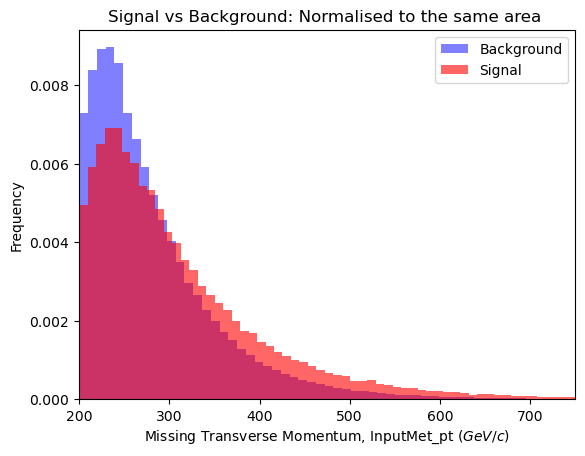

In [5]:
plt.hist(background_data['InputMet_pt'],bins=200,alpha=0.5,label='Background',color='blue',density=True)
plt.hist(signal_data['InputMet_pt'],bins=200,alpha=0.6,label='Signal',color='red',density=True)

plt.xlim(200,750)
plt.xlabel('Missing Transverse Momentum, InputMet_pt ($GeV/c$)')
plt.ylabel('Frequency')
plt.title("Signal vs Background: Normalised to the same area ")
plt.legend()
plt.show()

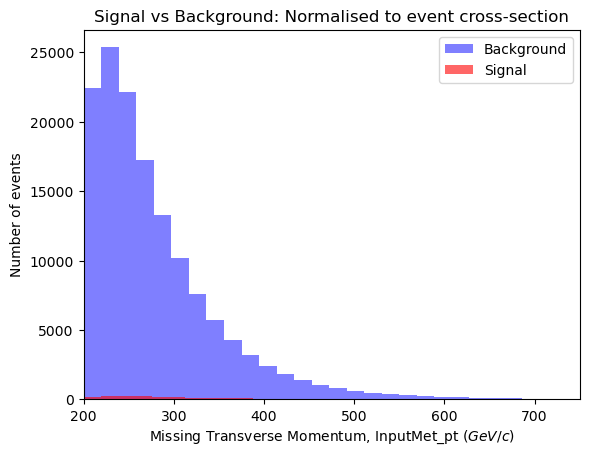

In [6]:
plt.hist(background_data['InputMet_pt'],bins=100,alpha=0.5,label='Background',weights=background_weight_140fb,color='blue')
plt.hist(signal_data['InputMet_pt'],bins=100,alpha=0.6,label='Signal',weights=signal_weight_140fb,color='red')

plt.xlim(200,750)
plt.xlabel('Missing Transverse Momentum, InputMet_pt ($GeV/c$)')
plt.ylabel('Number of events')
plt.title("Signal vs Background: Normalised to event cross-section")
plt.legend()
plt.show()

Area under the background histogram: 2759408.779560578
Area under the signal histogram: 37530.782523833484


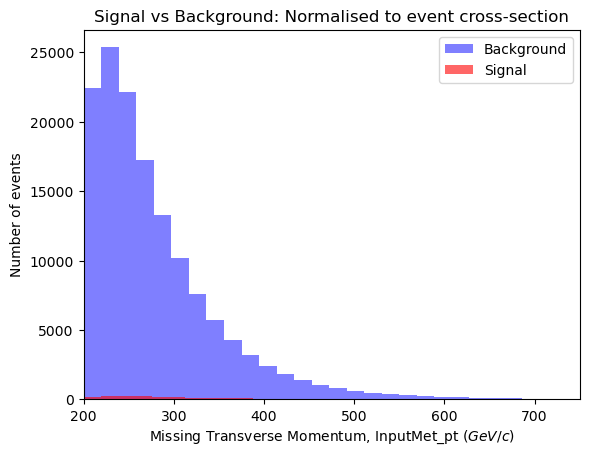

73.52388077195694


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histograms
background_counts, background_bins, _ = plt.hist(
    background_data['InputMet_pt'], 
    bins=100, 
    alpha=0.5, 
    label='Background', 
   color='blue', 
   weights=background_weight_140fb)
signal_counts, signal_bins, _ = plt.hist(
    signal_data['InputMet_pt'], bins=100, alpha=0.6, label='Signal', 
     color='red',weights=signal_weight_140fb)

# Calculate bin widths (assuming uniform bins)
background_bin_width = np.diff(background_bins)[0]
signal_bin_width = np.diff(signal_bins)[0]

# Calculate the total area under each histogram (sum of weighted counts)
background_area = np.sum(background_counts * background_bin_width)
signal_area = np.sum(signal_counts * signal_bin_width)

# Print the areas
print(f"Area under the background histogram: {background_area}")
print(f"Area under the signal histogram: {signal_area}")

# Set plot limits, labels, title, and legend
plt.xlim(200, 750)
plt.xlabel('Missing Transverse Momentum, InputMet_pt ($GeV/c$)')
plt.ylabel('Number of events')
plt.title("Signal vs Background: Normalised to event cross-section")
plt.legend()
plt.show()


print(background_area/signal_area)

Area under the background histogram: 386317229138.4809
Area under the signal histogram: 5254309553.336689


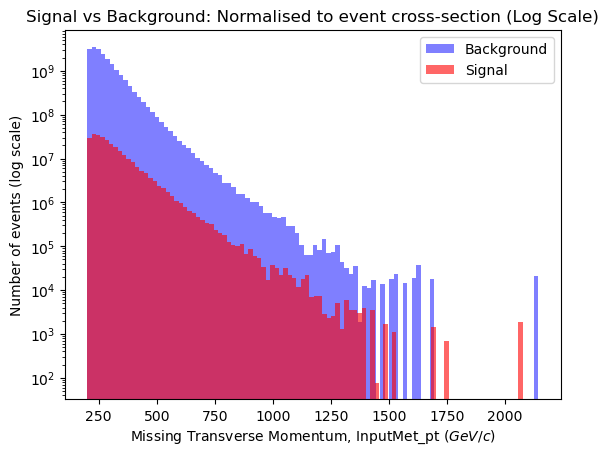

Background/Signal Area Ratio: 73.52388077195691


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histograms on a logarithmic scale
background_counts, background_bins, _ = plt.hist(
    background_data['InputMet_pt'], bins=100, alpha=0.5, label='Background', 
    weights=background_weight_140fb * 140000, color='blue'
)
signal_counts, signal_bins, _ = plt.hist(
    signal_data['InputMet_pt'], bins=100, alpha=0.6, label='Signal', 
    weights=signal_weight_140fb * 140000, color='red'
)

# Calculate bin widths (assuming uniform bins)
background_bin_width = np.diff(background_bins)[0]
signal_bin_width = np.diff(signal_bins)[0]

# Calculate the total area under each histogram (sum of weighted counts)
background_area = np.sum(background_counts * background_bin_width)
signal_area = np.sum(signal_counts * signal_bin_width)

# Print the areas
print(f"Area under the background histogram: {background_area}")
print(f"Area under the signal histogram: {signal_area}")

# Set plot limits, labels, title, legend, and log scale
plt.yscale('log')
plt.xlabel('Missing Transverse Momentum, InputMet_pt ($GeV/c$)')
plt.ylabel('Number of events (log scale)')
plt.title("Signal vs Background: Normalised to event cross-section (Log Scale)")
plt.legend()
plt.show()

# Ratio of background to signal areas
print(f"Background/Signal Area Ratio: {background_area / signal_area}")


### All Event Based Variable Plots

In [9]:
signal_data.columns

Index(['dataset', 'entry', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_phi', 'InputMet_pt', 'MHT_phi', 'MHT_pt', 'MinChi',
       'MinOmegaHat', 'MinOmegaTilde', 'Pred', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_eta', 'cleanedJet_mass',
       'cleanedJet_phi', 'cleanedJet_pt', 'hashed_filename', 'ldphi_bjet',
       'ldphi_jet', 'ncleanedBJet', 'ncleanedJet', 'region', 'sdphi_bjet',
       'sdphi_jet', 'weight_nominal', 'xs_weight'],
      dtype='object')


Normalised histograms to the same area.





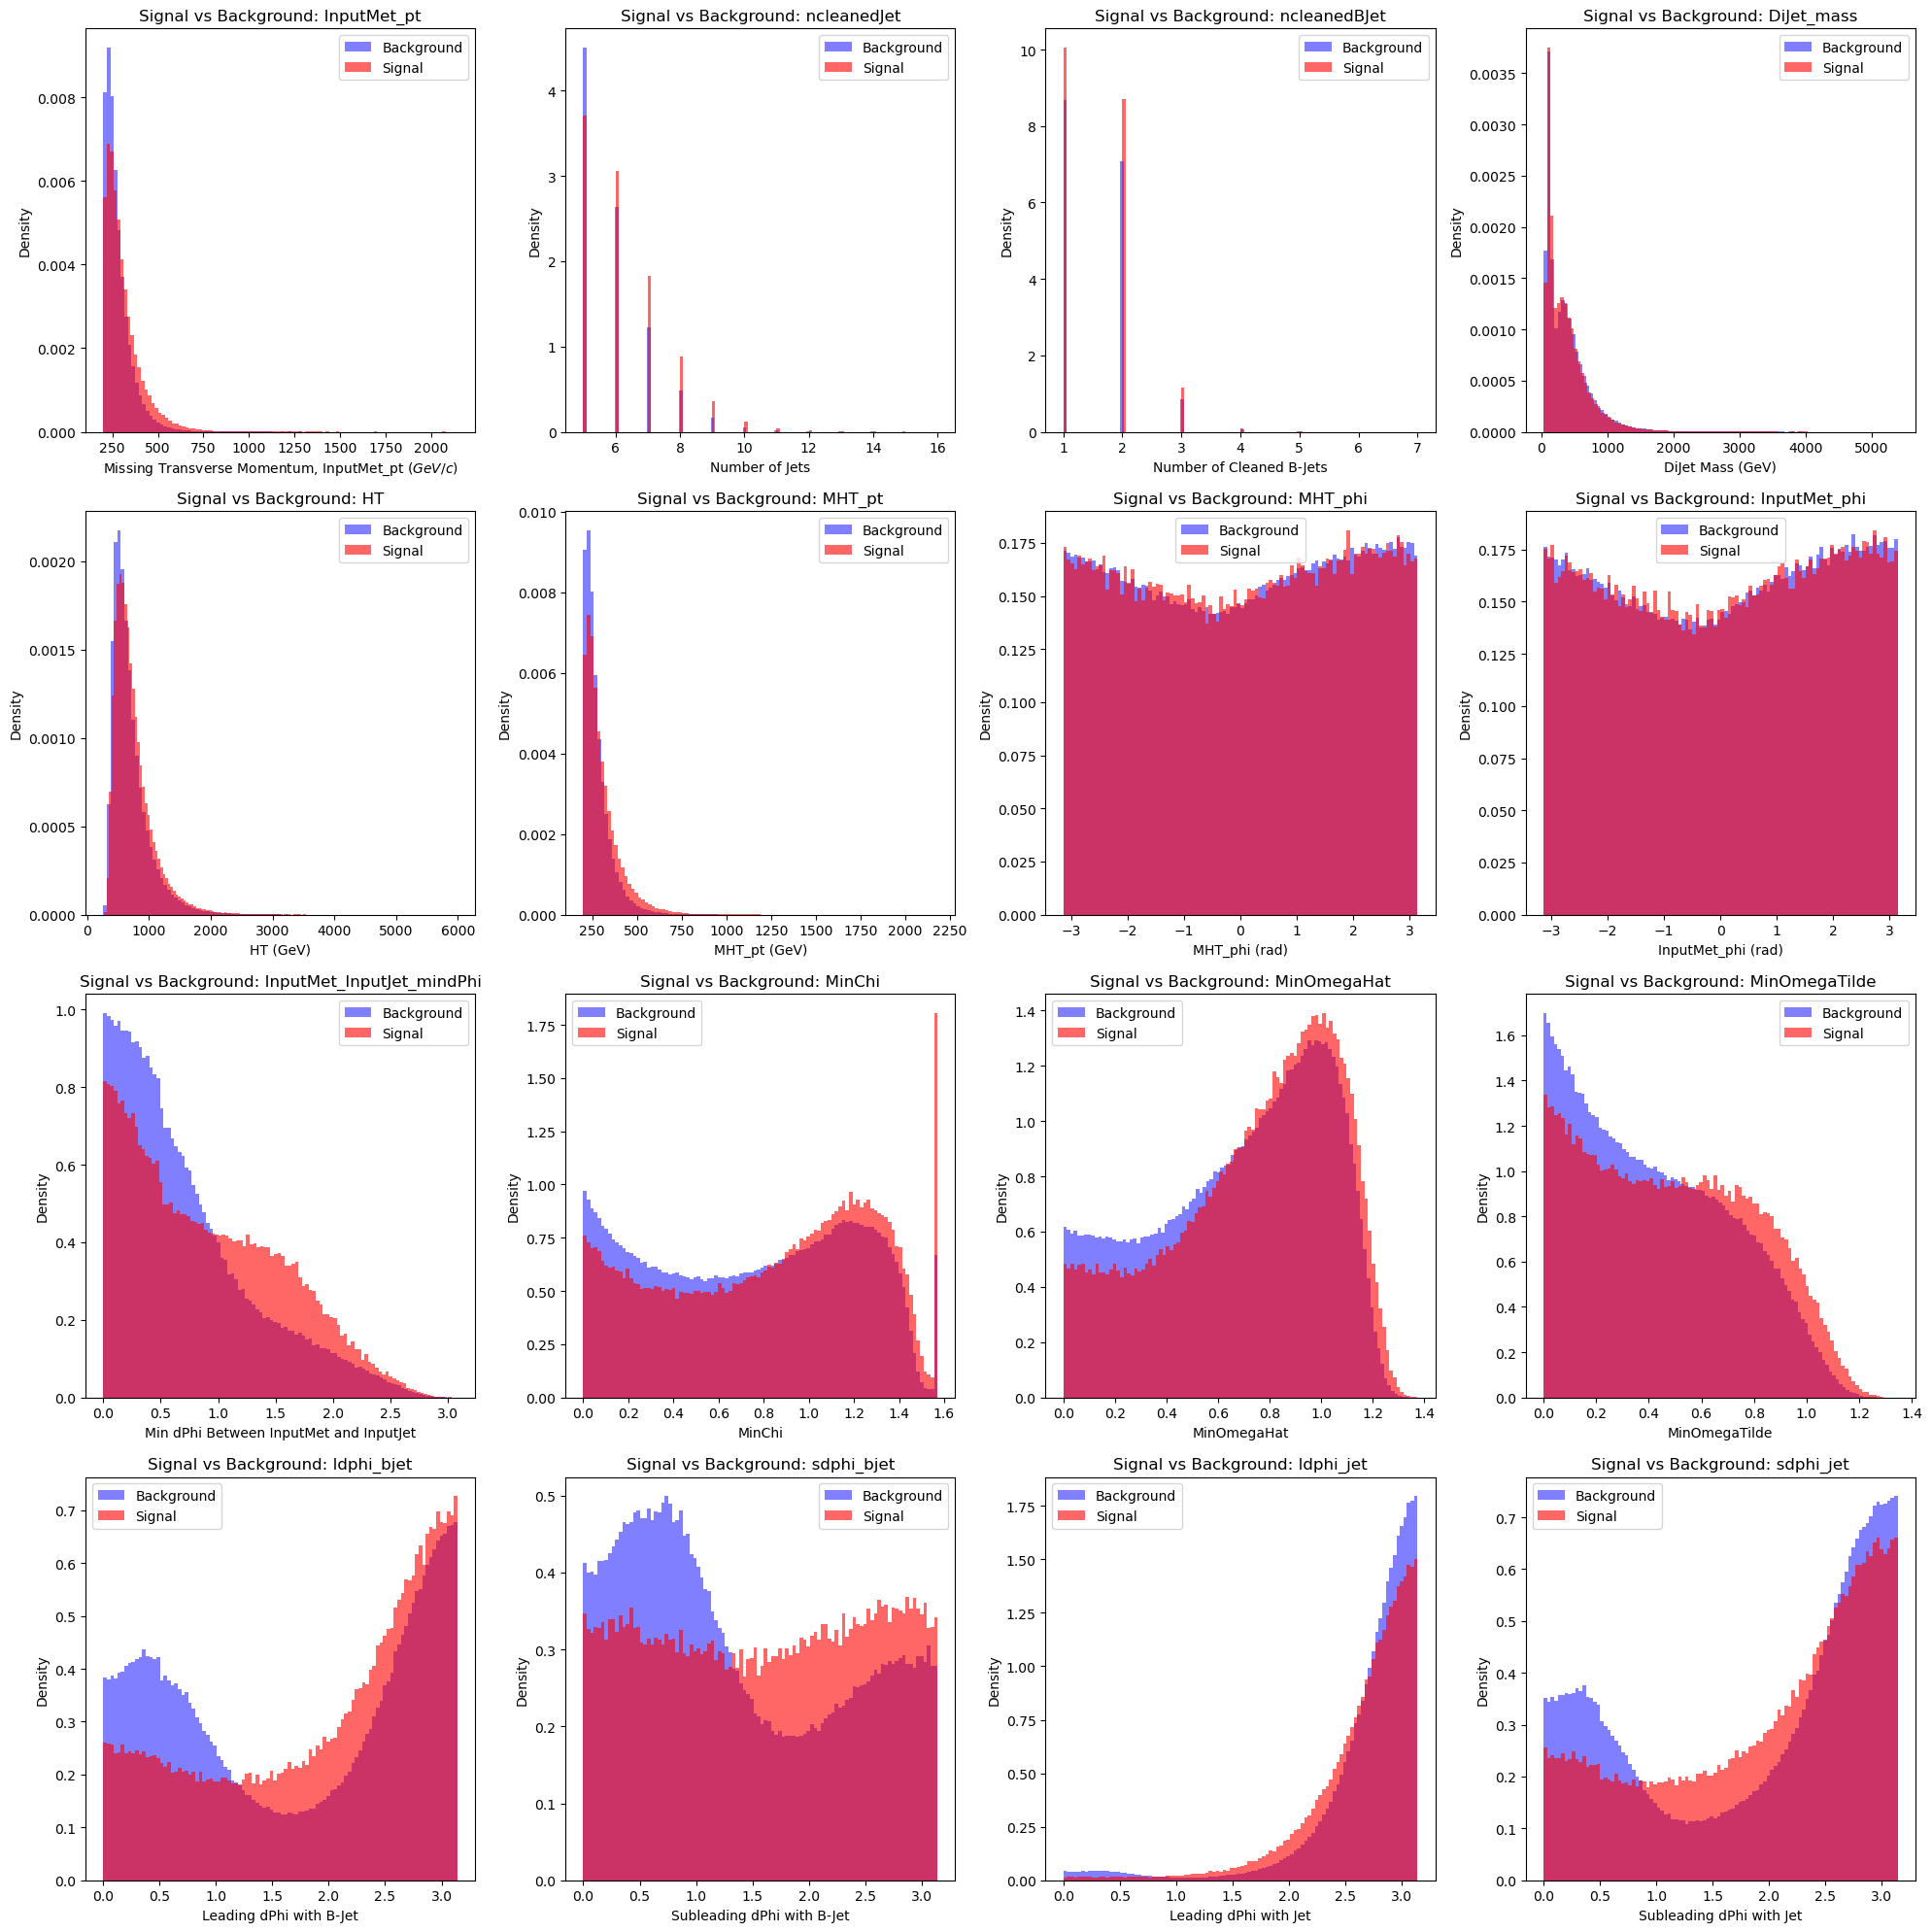


 
 
 
 
 
 
 


Normalised to cross section - Linear Histograms 





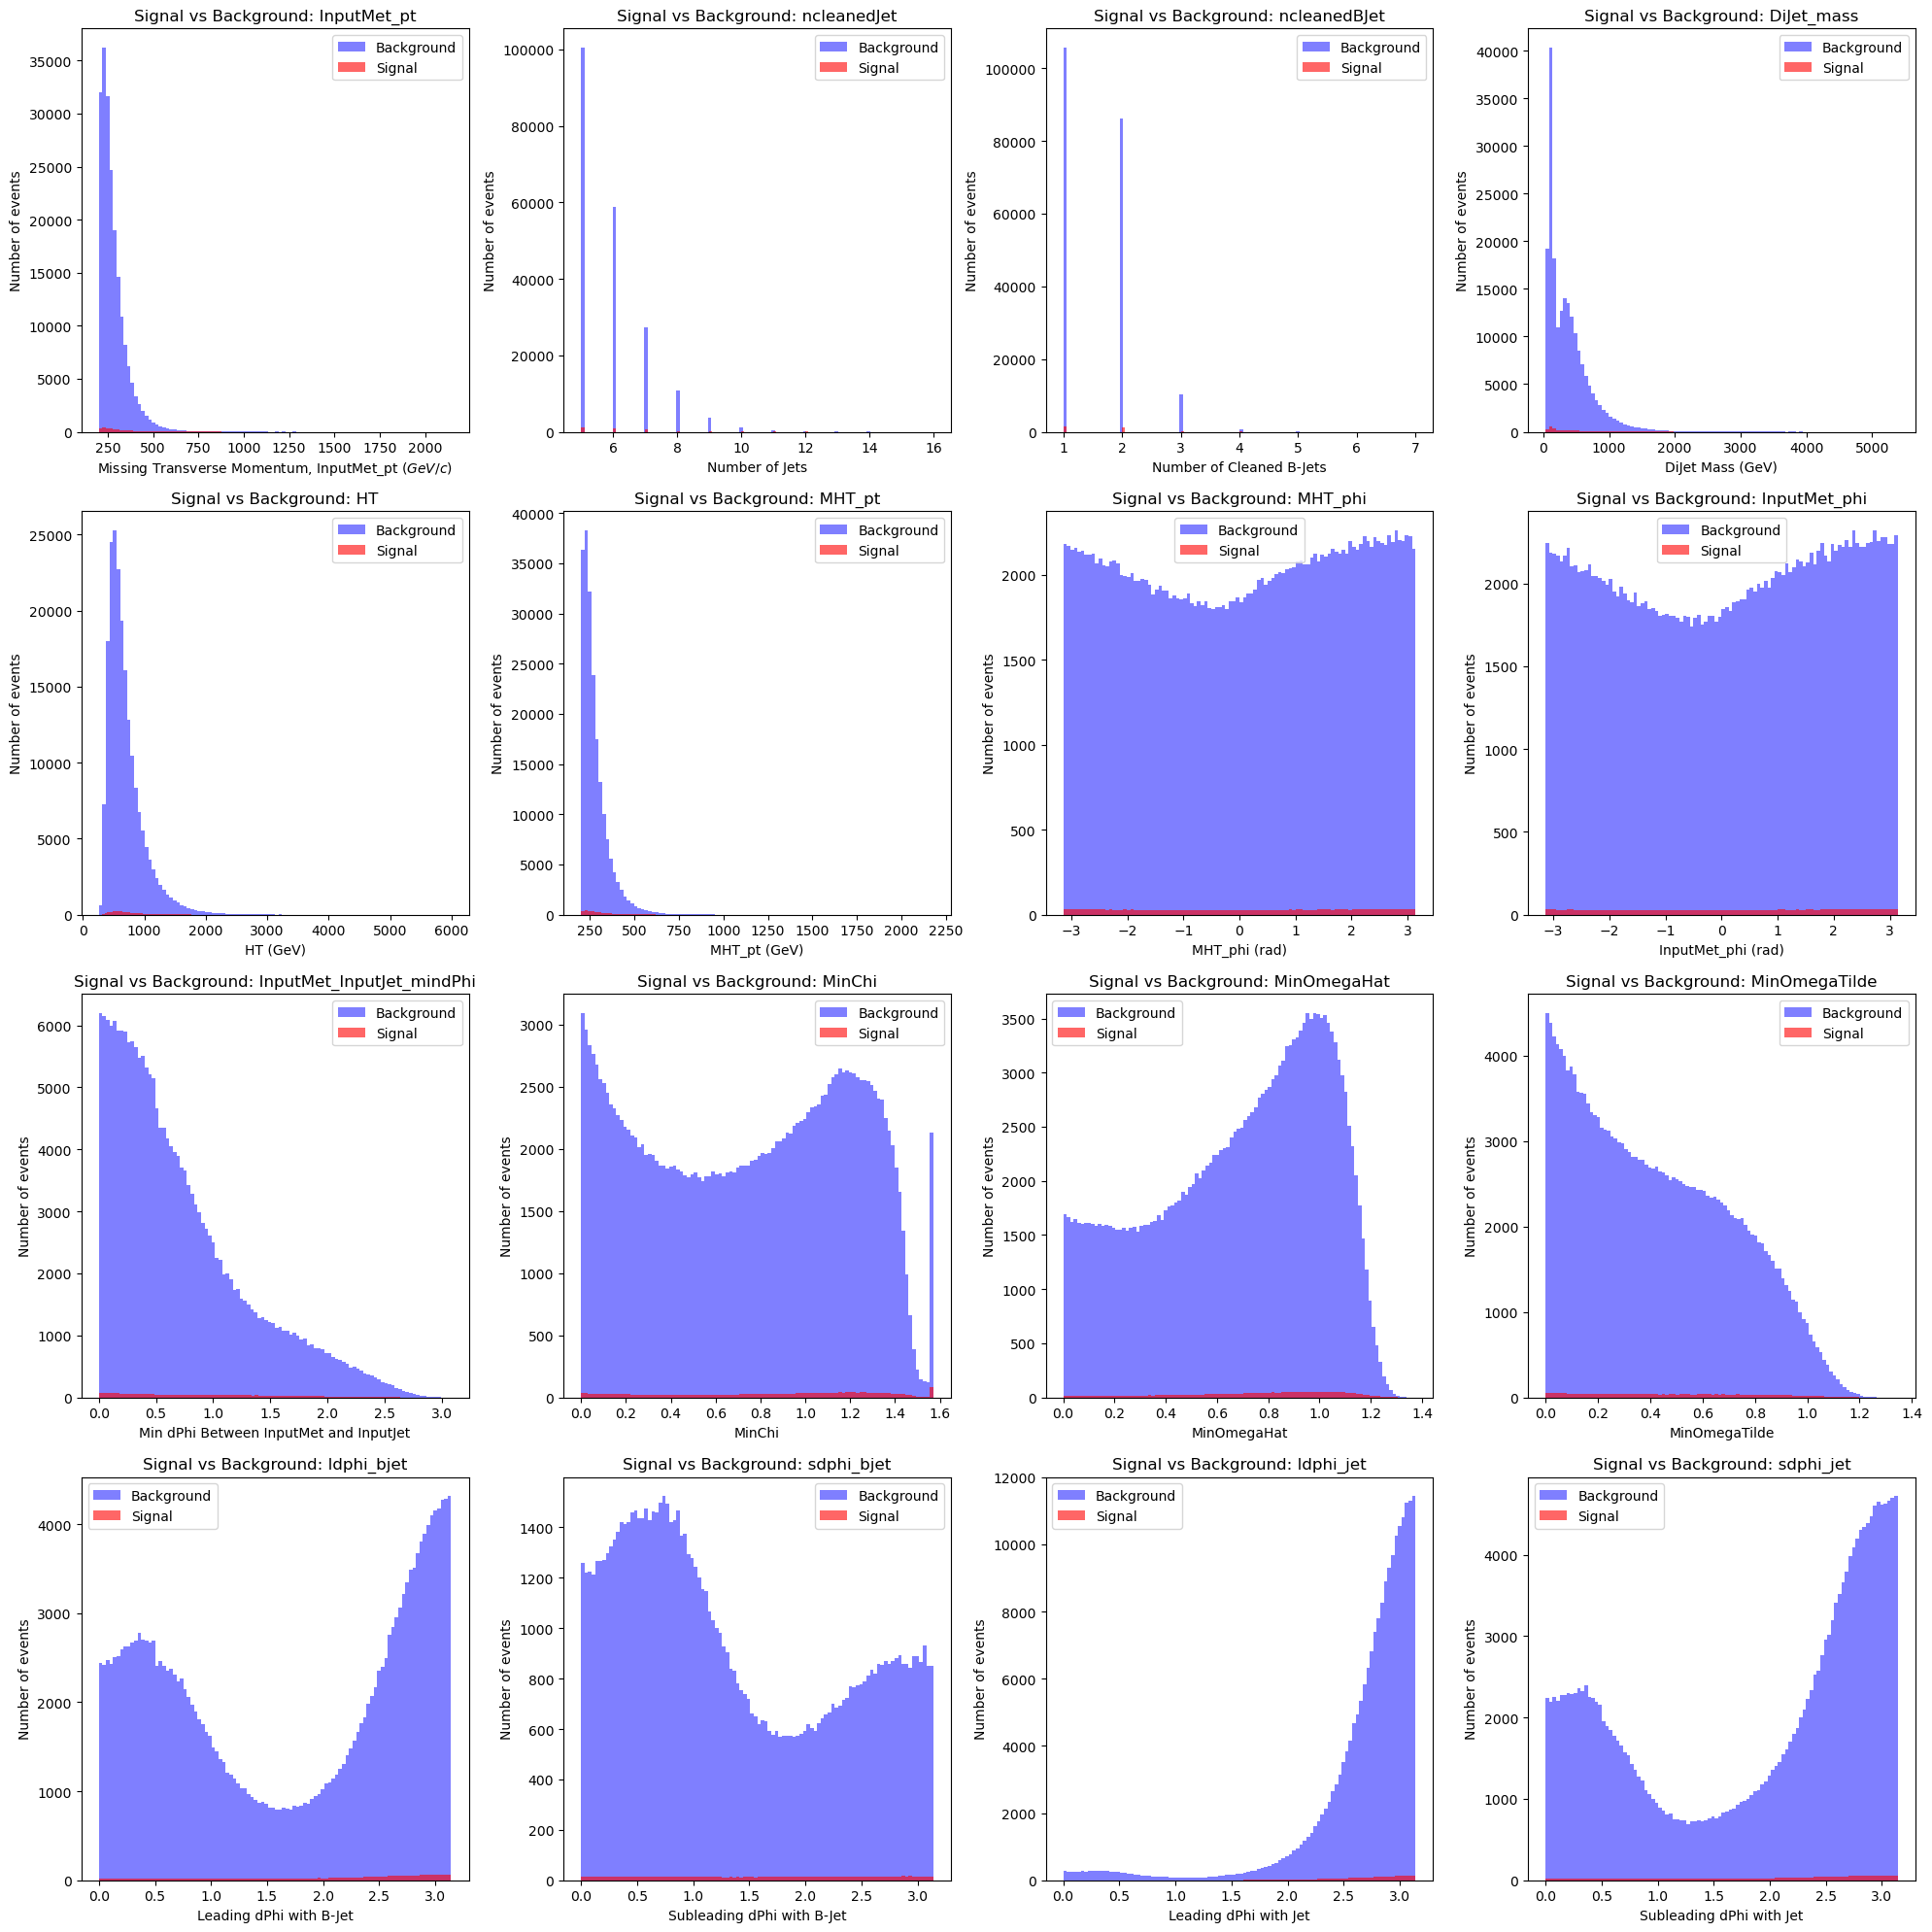


 
 
 
 
 
 
 


Logarithmic Histograms - Normalised to cross section 
 



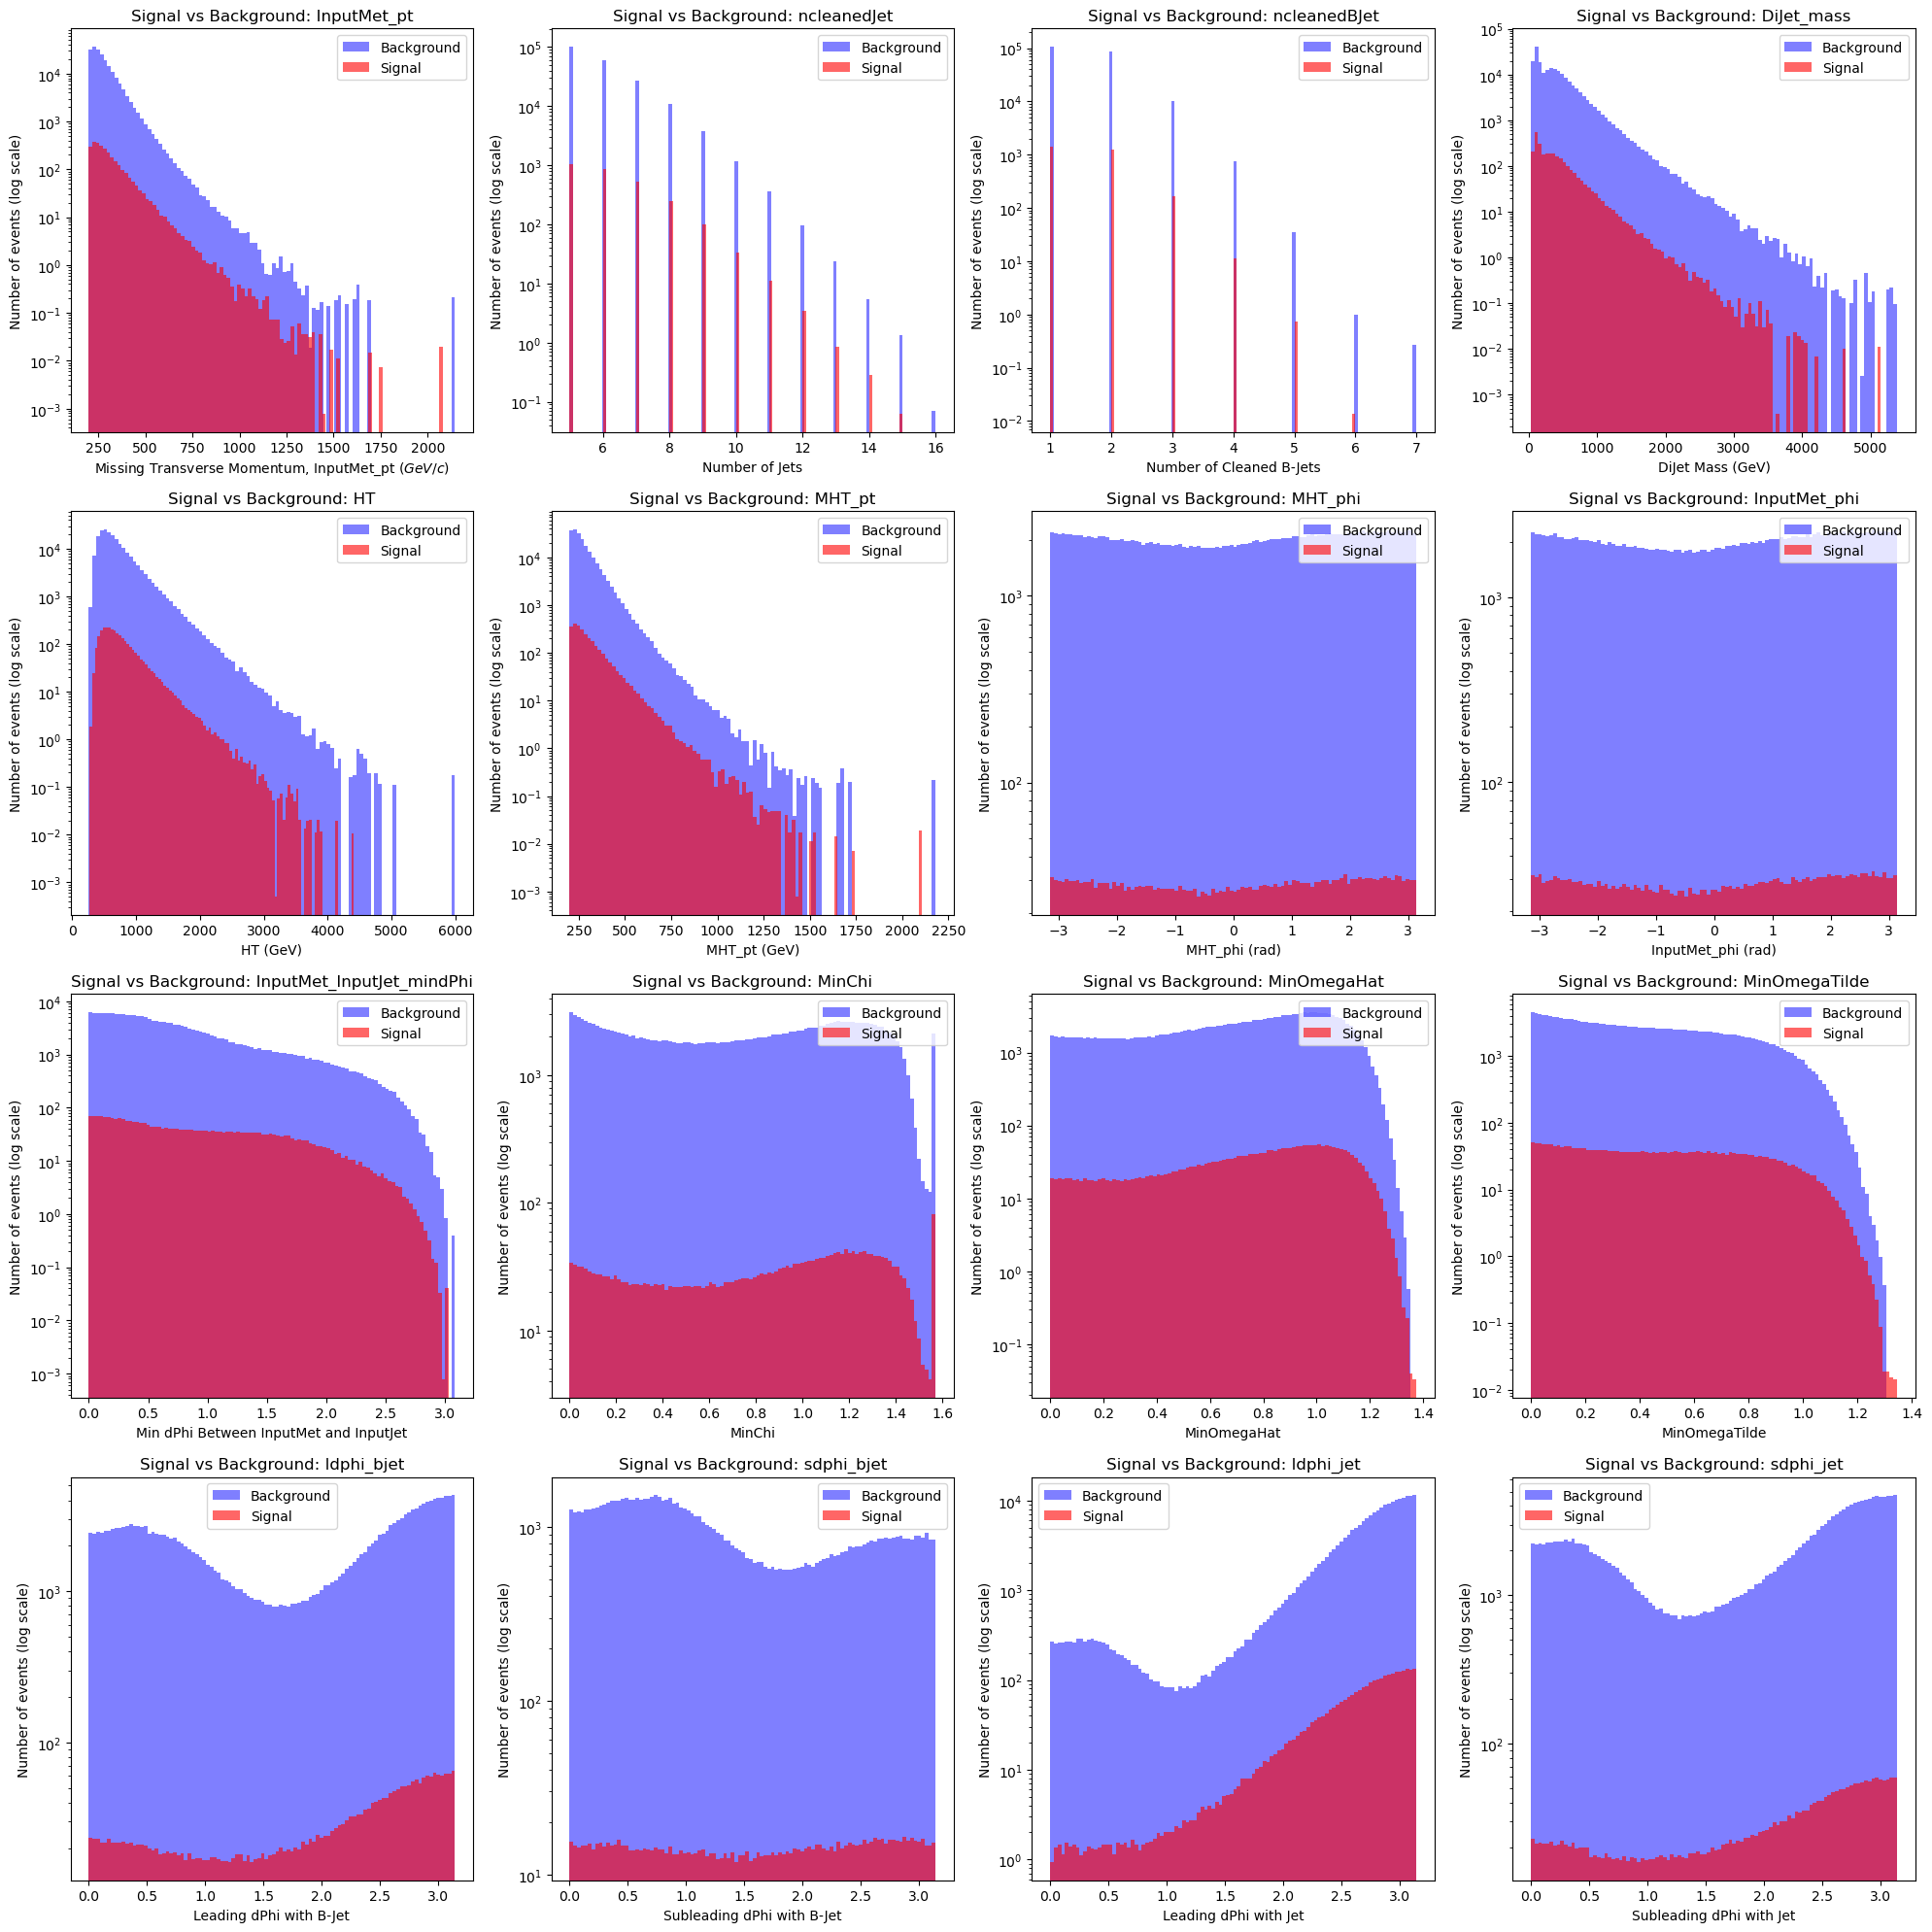

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(variables, titles, xlabels, background_data, signal_data, background_weights, signal_weights, num_bins=100, plots_per_row=4):
    """
    Plots normalized, unnormalized, and logarithmic histograms for each variable in 'variables',
    comparing signal and background distributions.
    """
    num_plots = len(variables)
    num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # Calculate rows needed for 4 plots per row

    # Part 1: Normalized Histograms
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(5 * plots_per_row, 5 * num_rows))
    axs = axs.flatten()  # Flatten the axes array to index it linearly



    print("\nNormalised histograms to the same area.\n\n\n")

    for i, var in enumerate(variables):
        # Plot normalized histograms with density=True
        axs[i].hist(
            background_data[var], bins=num_bins, alpha=0.5, label='Background', 
            weights=background_weight_200fb, color='blue', density=True
        )
        axs[i].hist(
            signal_data[var], bins=num_bins, alpha=0.6, label='Signal', 
            weights=signal_weight_200fb, color='red', density=True
        )
        
        # Set plot limits, labels, title, and legend
        axs[i].set_xlabel(xlabels[i] if xlabels[i] else 'Variable')
        axs[i].set_ylabel('Density')
        axs[i].set_title(titles[i] if titles[i] else f'Normalized Signal vs Background: {var}')
        axs[i].legend()

    # Turn off unused subplots
    for j in range(i + 1, num_rows * plots_per_row):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    # Part 2: Unnormalized Histograms
    print("\n \n \n \n \n \n \n \n")
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(5 * plots_per_row, 5 * num_rows))
    axs = axs.flatten()  # Flatten the axes array to index it linearly
    
    
    print("\nNormalised to cross section - Linear Histograms \n\n\n")
    for i, var in enumerate(variables):
        # Plot unnormalized histograms
        axs[i].hist(
            background_data[var], bins=num_bins, alpha=0.5, label='Background', 
            weights=background_weight_200fb, color='blue'
        )
        axs[i].hist(
            signal_data[var], bins=num_bins, alpha=0.6, label='Signal', 
            weights=signal_weight_200fb, color='red'
        )
        
        # Set plot limits, labels, title, and legend
        axs[i].set_xlabel(xlabels[i] if xlabels[i] else 'Variable')
        axs[i].set_ylabel('Number of events')
        axs[i].set_title(titles[i] if titles[i] else f'Signal vs Background: {var}')
        axs[i].legend()

    # Turn off unused subplots
    for j in range(i + 1, num_rows * plots_per_row):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    # Part 3: Logarithmic Histograms
    print("\n \n \n \n \n \n \n \n")
    fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(5 * plots_per_row, 5 * num_rows))
    axs = axs.flatten()  # Flatten the axes array to index it linearly




    print("\nLogarithmic Histograms - Normalised to cross section \n \n")

    for i, var in enumerate(variables):
        # Plot unnormalized histograms for log scale
        axs[i].hist(
            background_data[var], bins=num_bins, alpha=0.5, label='Background', 
            weights=background_weight_200fb, color='blue'
        )
        axs[i].hist(
            signal_data[var], bins=num_bins, alpha=0.6, label='Signal', 
            weights=signal_weight_200fb, color='red'
        )
        
        # Set plot limits, labels, title, legend, and logarithmic scale
        axs[i].set_xlabel(xlabels[i] if xlabels[i] else 'Variable')
        axs[i].set_ylabel('Number of events (log scale)')
        axs[i].set_yscale('log')  # Set y-axis to logarithmic scale
        axs[i].set_title(titles[i] if titles[i] else f'Logarithmic Signal vs Background: {var}')
        axs[i].legend()

    # Turn off unused subplots
    for j in range(i + 1, num_rows * plots_per_row):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Example usage with additional variables:
variables = [
    'InputMet_pt', 'ncleanedJet', 'ncleanedBJet', 'DiJet_mass', 'HT', 'MHT_pt', 'MHT_phi', 'InputMet_phi', 
    'InputMet_InputJet_mindPhi', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde', 
    'ldphi_bjet', 'sdphi_bjet', 'ldphi_jet', 'sdphi_jet'
]
titles = [
    "Signal vs Background: InputMet_pt", "Signal vs Background: ncleanedJet", "Signal vs Background: ncleanedBJet", 
    "Signal vs Background: DiJet_mass", "Signal vs Background: HT", "Signal vs Background: MHT_pt", 
    "Signal vs Background: MHT_phi", "Signal vs Background: InputMet_phi", 
    "Signal vs Background: InputMet_InputJet_mindPhi", "Signal vs Background: MinChi", 
    "Signal vs Background: MinOmegaHat", "Signal vs Background: MinOmegaTilde", 
    "Signal vs Background: ldphi_bjet", "Signal vs Background: sdphi_bjet", 
    "Signal vs Background: ldphi_jet", "Signal vs Background: sdphi_jet"
]
xlabels = [
    'Missing Transverse Momentum, InputMet_pt ($GeV/c$)', 'Number of Jets', 'Number of Cleaned B-Jets', 
    'DiJet Mass (GeV)', 'HT (GeV)', 'MHT_pt (GeV)', 'MHT_phi (rad)', 'InputMet_phi (rad)', 
    'Min dPhi Between InputMet and InputJet', 'MinChi', 'MinOmegaHat', 'MinOmegaTilde', 
    'Leading dPhi with B-Jet', 'Subleading dPhi with B-Jet', 'Leading dPhi with Jet', 'Subleading dPhi with Jet'
]

plot_histograms(variables, titles, xlabels, background_data, signal_data, background_weight_200fb, signal_weight_200fb)


## XGBoost

In [11]:
signal_data.columns

Index(['dataset', 'entry', 'DiJet_mass', 'HT', 'InputMet_InputJet_mindPhi',
       'InputMet_phi', 'InputMet_pt', 'MHT_phi', 'MHT_pt', 'MinChi',
       'MinOmegaHat', 'MinOmegaTilde', 'Pred', 'cleanedJet_area',
       'cleanedJet_btagDeepB', 'cleanedJet_eta', 'cleanedJet_mass',
       'cleanedJet_phi', 'cleanedJet_pt', 'hashed_filename', 'ldphi_bjet',
       'ldphi_jet', 'ncleanedBJet', 'ncleanedJet', 'region', 'sdphi_bjet',
       'sdphi_jet', 'weight_nominal', 'xs_weight'],
      dtype='object')

In [12]:
print(len(signal_data))
print(len(background_data))

199770
1251607


#### Running XGBoost

In [13]:
# #######retain this

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, auc
# import xgboost as xgb
# import matplotlib.pyplot as plt

# signal_data['target'] = 1
# background_data['target'] = 0
# data = pd.concat([signal_data, background_data], ignore_index=True)
# data = data.dropna()
# data = data.select_dtypes(exclude=['object'])

# #Separate features and target, drop all irrelevant columns in the data
# X = data.drop(columns=['target',
#      'weight_nominal', 
#      'xs_weight', 
#      'hashed_filename', 
#      'entry', 
#      'Pred', 
#      'region',
#      'MHT_phi',
#      'InputMet_phi'])
# y = data['target']




# #Split data into training/testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Train XGBoost classifier
# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# model.fit(X_train, y_train)

# #Predict probabilities for the test set and calculate ROC
# y_pred_proba = model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)


# #ROC curve
# plt.figure(figsize=(8, 6))
# #plotting curve
# plt.plot(fpr, 
#          tpr, 
#          color='blue', 
#          lw=2, 
#          label=f'XGBoost ROC curve (area = {roc_auc:.2f})')
# #plotting dashed line
# plt.plot([0, 1], 
#          [0, 1], 
#          color='gray', 
#          linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

/software/da21592/miniconda3/envs/proj_env/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [20:10:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


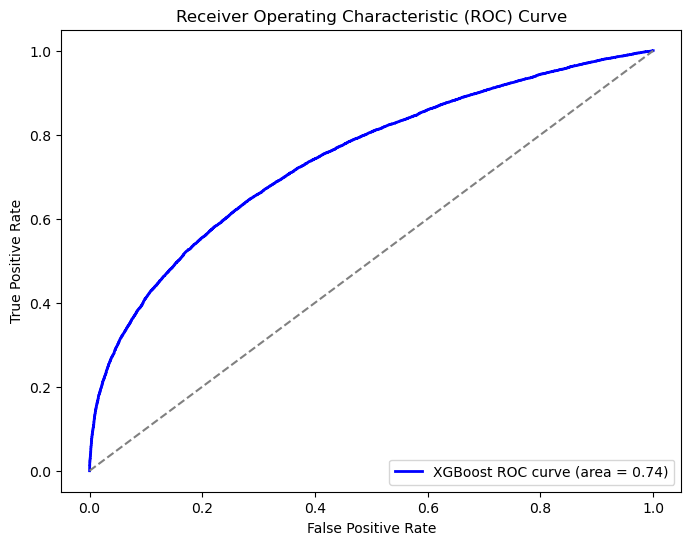

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt

# Assign target labels
signal_data['target'] = 1
background_data['target'] = 0

# Downsample background_data to match signal_data's row count -> making sure len(sig_data) = len(BG_data) 
background_data_balanced = background_data.sample(n=len(signal_data), random_state=42)

# Combine signal and downsampled background data
data = pd.concat([signal_data, background_data_balanced], ignore_index=True)
data = data.dropna()
data = data.select_dtypes(exclude=['object'])
# weights = data['weight]

# Separate features and target, dropping irrelevant columns
X = data.drop(columns=['target', 
                    'weight_nominal', 
                    'xs_weight',
                    'hashed_filename', 
                    'entry',
                    'Pred', 
                    'region', 
                    'MHT_phi', 
                    'InputMet_phi'])
y = data['target']

# Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict probabilities for the test set and calculate ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Plotting the distribution of predicted probabilities

In [15]:
# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


print(X_train.shape[0] + X_test.shape[0])
print(len(signal_data))


X_train shape: (161836, 14)
y_train shape: (161836,)
X_test shape: (40459, 14)
y_test shape: (40459,)
202295
199770


In [16]:
scale_factor = (len(background_data)/len(signal_data))

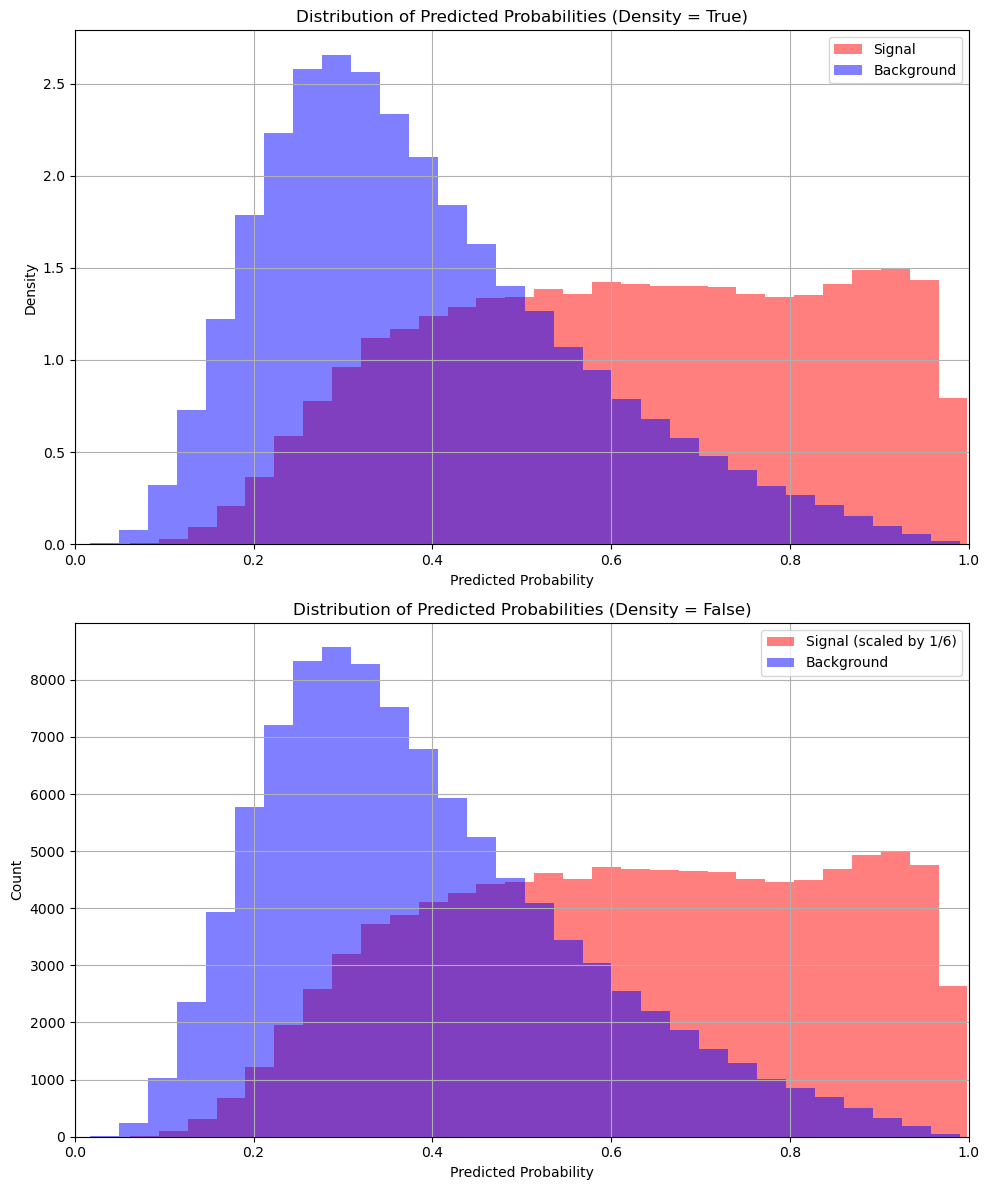

In [17]:
# Predict probabilities for the entire dataset
y_full_pred_proba = model.predict_proba(X)[:, 1]

# Create a DataFrame to hold the predicted probabilities with their corresponding target labels
predicted_probs_df = pd.DataFrame({'probability': y_full_pred_proba, 'target': y})

# Plot the distribution of predicted probabilities with density=True
plt.figure(figsize=(10, 12))

# First subplot: Density = True
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 1]['probability'], 
         bins=30, 
         alpha=0.5, 
         label='Signal', 
         color='red', 
         density=True)
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 0]['probability'], 
         bins=30, 
         alpha=0.5, 
         label='Background', 
         color='blue', 
         density=True)

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities (Density = True)')
plt.legend()
plt.xlim(0, 1)  # Set x-axis limits to show probabilities between 0 and 1
plt.grid()

# Second subplot: Density = False with Signal scaled down by a factor of 6
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 1]['probability'], 
         bins=30, 
         alpha=0.5, 
         label='Signal (scaled by 1/6)', 
         color='red', 
         density=False)
         #weights=np.ones(len(predicted_probs_df[predicted_probs_df['target'] == 1])) / scale_factor)
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 0]['probability'], 
         bins=30, 
         alpha=0.5, 
         label='Background',
         color='blue', 
         density=False)

plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities (Density = False)')
plt.legend()
plt.xlim(0, 1)  # Set x-axis limits to show probabilities between 0 and 1
plt.grid()

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

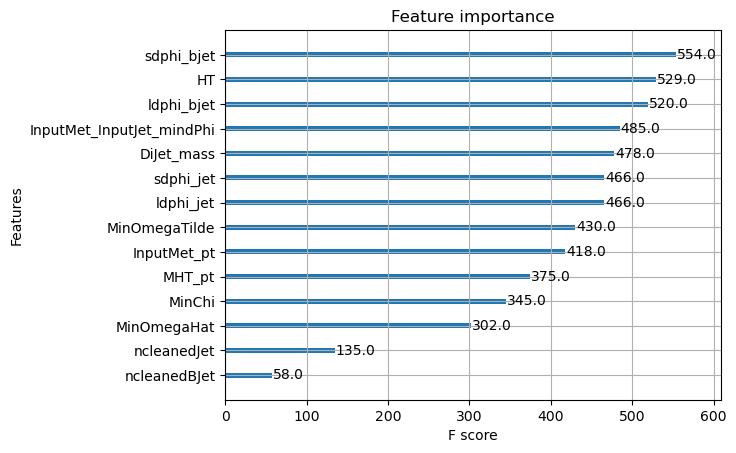

In [18]:
xgb.plot_importance(model)

### Class Imbalance

Now we want to ensure all the event based weights are being taken into account

In [19]:
#1: Find the total weight for the original background data 
total_background_weight = background_data['weight_nominal'].sum()

#2: Sample len(signal_data) rows in the background_data to ensure such that the df lengths match up
background_sample = background_data.sample(len(signal_data),random_state=42)

#3: Now find the total weight for the SAMPLED background data which we have just taken
background_sample_total_weight = background_sample['weight_nominal'].sum()

#4: Find scale factor between the weights of the original vs sampled BG data
scale_factor = total_background_weight/background_sample_total_weight

#5: Scale the weights of the sampled background ROWS
background_sample['weight_nominal_scaled'] = background_sample['weight_nominal'] * scale_factor


#6:Check total weight of original vs sampled BG data match
print("Total original background data weight is: "+str(total_background_weight))
print("Total sampled background data weight is: "+str((background_sample['weight_nominal_scaled']*scale_factor).sum()) + "\n\n")

#7 Check that signal and background now have equal no. of rows
print("Number of rows in signal_data is: "+ str(len(signal_data)))
print("Number of rows in background_sample data is: "+ str(len(background_sample)))


signal_data['weight_nominal_scaled'] = signal_data['weight_nominal']


Total original background data weight is: 1.0139572489695168
Total sampled background data weight is: 6.348167008871348


Number of rows in signal_data is: 199770
Number of rows in background_sample data is: 199770


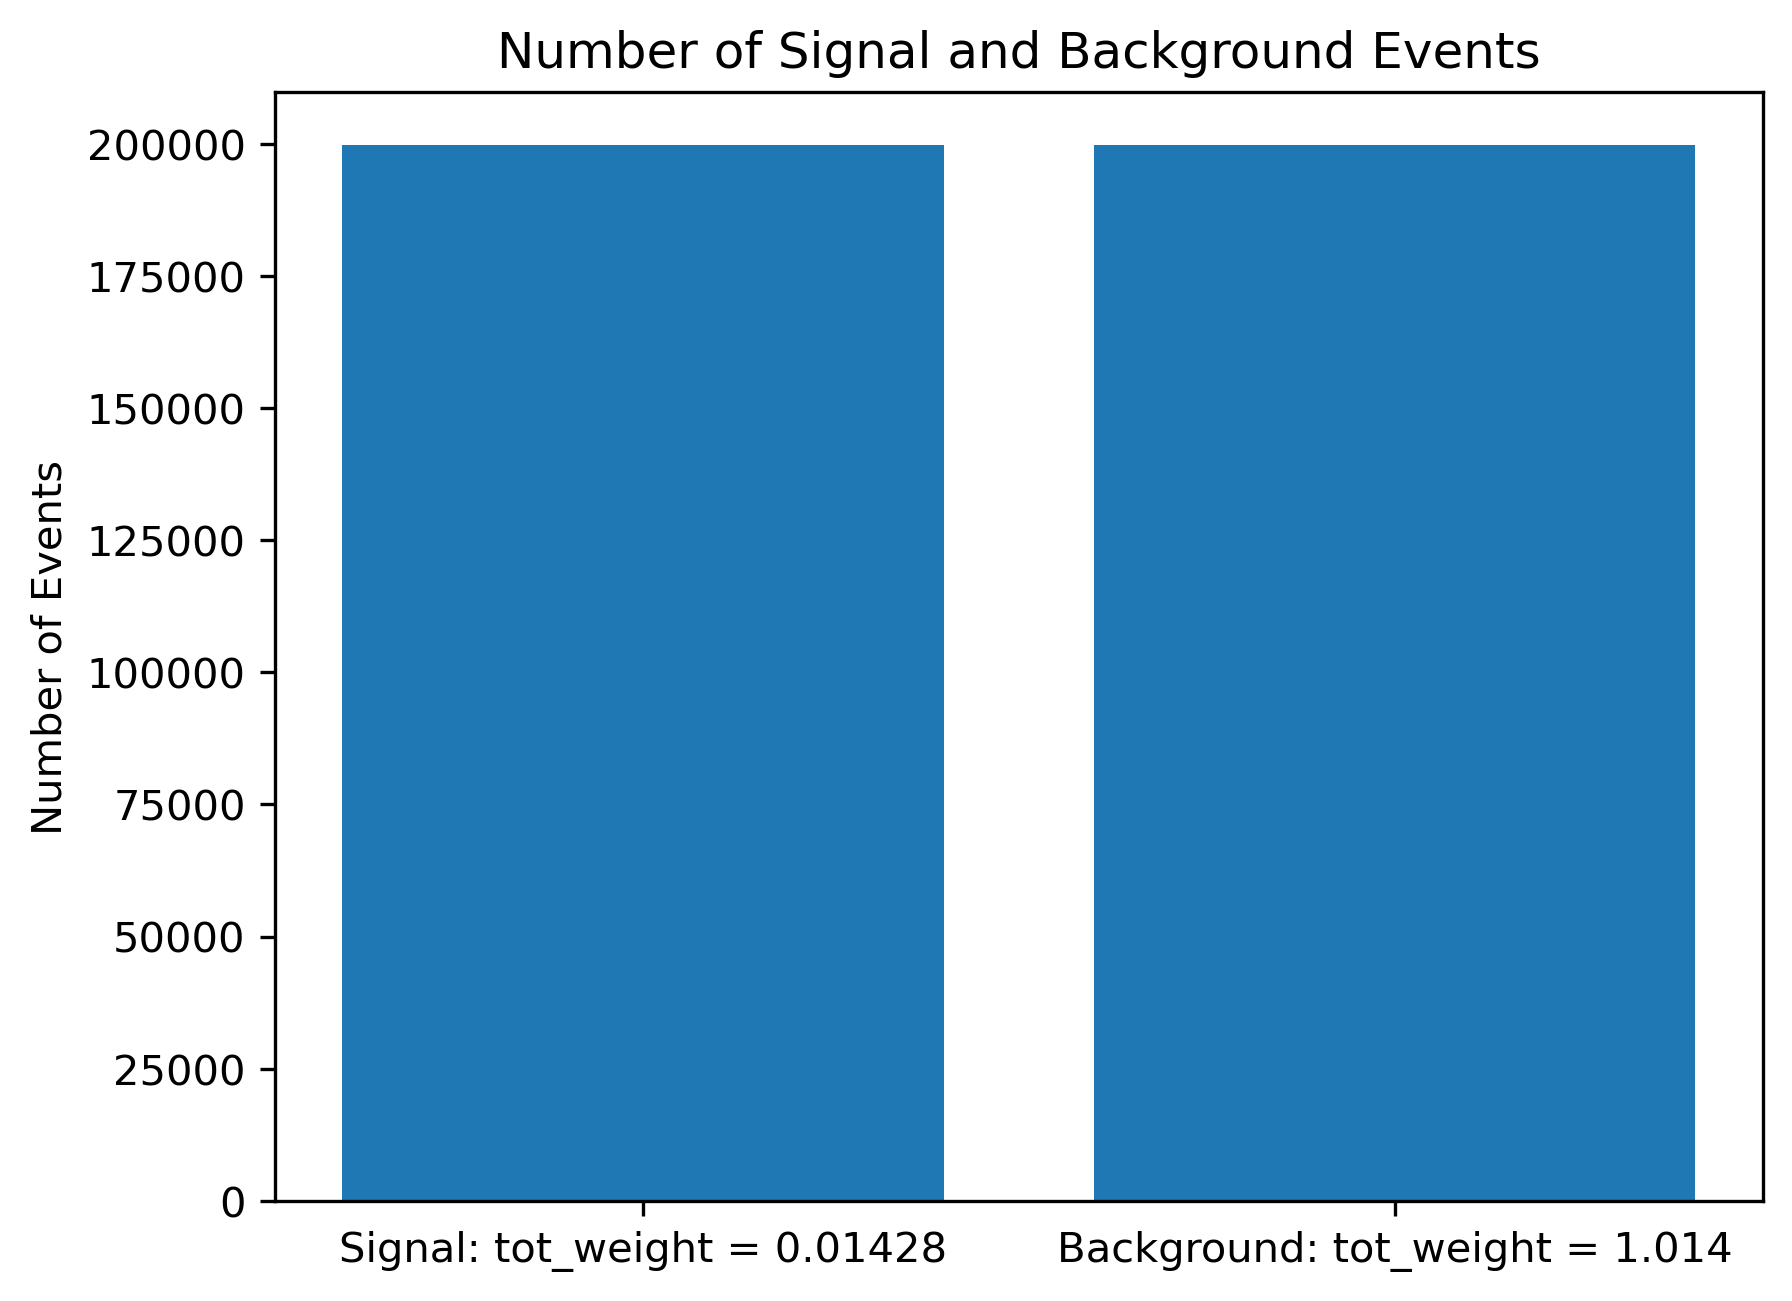

In [20]:
plt.figure(dpi=300)
plt.bar([0, 1], [len(signal_data), len(background_sample)])
plt.xticks([0, 1], [f'Signal: tot_weight = {np.sum(signal_data["weight_nominal"]):.4g}', f'Background: tot_weight = {np.sum(background_data["weight_nominal"]):.4g}'])

plt.ylabel('Number of Events')
plt.title('Number of Signal and Background Events')
plt.show()

/software/da21592/miniconda3/envs/proj_env/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [20:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


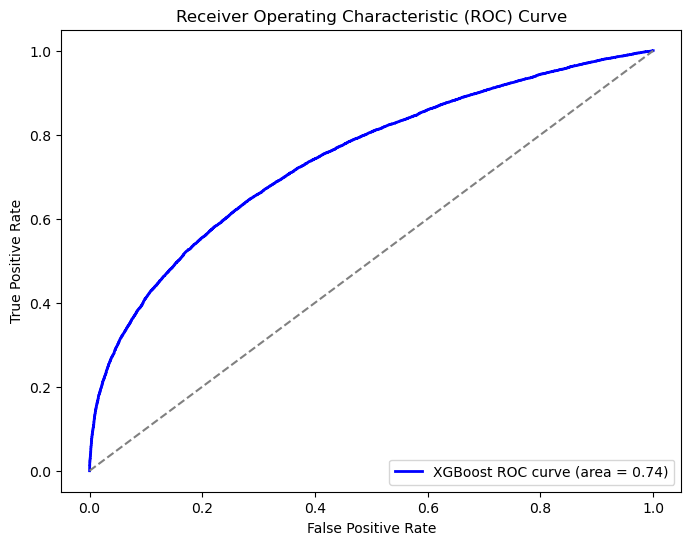

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Assign target labels
signal_data['target'] = 1
background_sample['target'] = 0

# Combine signal and downsampled background data (we just downsampled the background 2 cells ago)
data = pd.concat([signal_data, background_sample], ignore_index=True)
data = data.dropna()
data = data.select_dtypes(exclude=['object'])

#need to remember weights of each event
weights = data['weight_nominal_scaled']


# Downsample background_data to match signal_data's row count   ->   making sure len(sig_data) = len(BG_data) 
#background_data_balanced = background_data.sample(n=len(signal_data), random_state=42)


# Separate features and target, dropping irrelevant columns
X = data.drop(columns=['target', 
                    'weight_nominal', 
                    'xs_weight',
                    'hashed_filename', 
                    'entry',
                    'Pred', 
                    'region', 
                    'MHT_phi', 
                    'InputMet_phi',
                    'weight_nominal_scaled'])
y = data['target']

# Split data into training/testing sets
# Including train_weights and test_weights this time
X_train, X_test, y_train, y_test, train_weights, test_weights = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

#run predictions
y_pred = model.predict(X_test)
# Predict probabilities for the test set 
y_proba = model.predict_proba(X_test)

#Calculate ROC. 'thresholds' could be anything..?
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])

#area under ROC curve
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost ROC curve (area = {roc_auc:.2f})')

#plot diagonal (random chance line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test, y_pred_proba)
# print(f"Accuracy: {accuracy:.4f}")

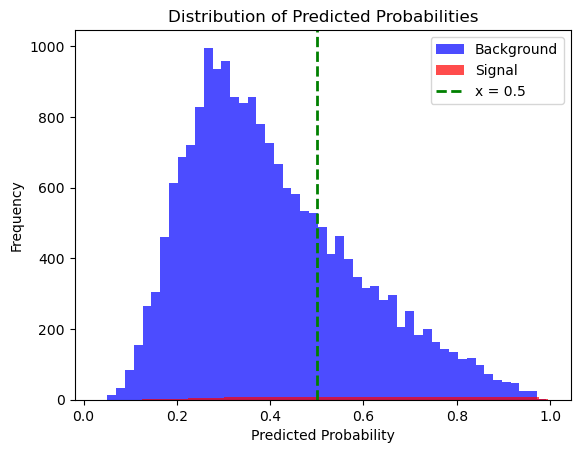

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate the probabilities and scaled weights for signal and background
signal_proba = y_proba[y_test == 1][:, 1]
background_proba = y_proba[y_test == 0][:, 1]
signal_weights = test_weights[y_test == 1] * 200000
background_weights = test_weights[y_test == 0] * 200000

# Plot histograms for signal and background
plt.hist(
    background_proba,
    bins=50,
    color='blue',
    alpha=0.7,
    label='Background',
    weights=background_weights
)
plt.hist(
    signal_proba,
    bins=50,
    color='red',
    alpha=0.7,
    label='Signal',
    weights=signal_weights
)

# Add a vertical line at x = 0.5
plt.axvline(x=0.5, color='green', linestyle='--', linewidth=2, label='x = 0.5')

# Add labels and title
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Display the plot
plt.show()


#### Plotting z score thresholds

- Signal Events (S): Counts the weighted sum of signal events where signal_proba is above the threshold. (S is correctly identified signal)

- Background Events (B): Counts the weighted sum of background events where background_proba is above the threshold. (B is correctly identified background)

- Z-score Calculation: Uses $Z=S/(sqrt(B))$ to quantify the separation between signal and background for each threshold.

/tmp/ipykernel_1334331/590651205.py:13: RuntimeWarning: divide by zero encountered in divide
  signal_counts / np.sqrt(background_counts),
/tmp/ipykernel_1334331/590651205.py:13: RuntimeWarning: invalid value encountered in divide
  signal_counts / np.sqrt(background_counts),


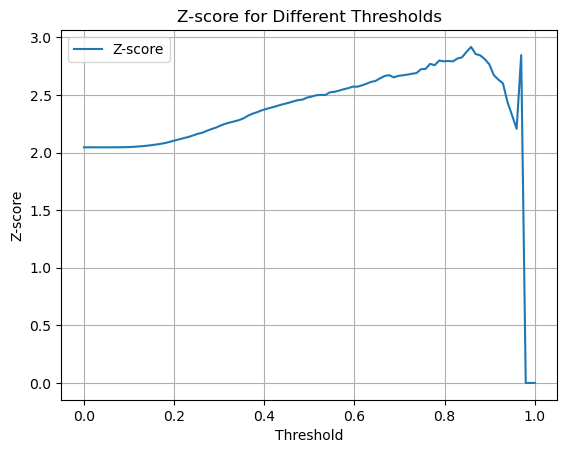

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Calculate weighted counts (areas) for signal and background on the right side of each threshold
signal_counts = np.array([np.sum(signal_weights[signal_proba >= t]) for t in thresholds])
background_counts = np.array([np.sum(background_weights[background_proba >= t]) for t in thresholds])

# Calculate Z-scores, handling division by zero using np.where
z_scores = np.where(background_counts > 0, 
                    signal_counts / np.sqrt(background_counts), 
                    0)
    
# Plot Z-scores against thresholds
plt.plot(thresholds, z_scores, label='Z-score')
plt.xlabel('Threshold')
plt.ylabel('Z-score')
plt.title('Z-score for Different Thresholds')
plt.legend()
plt.grid()
plt.show()


# MLP - SciKit

First using sklearn

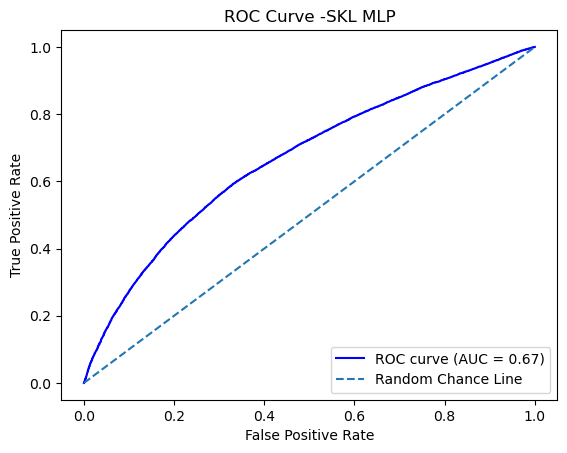

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,roc_auc_score

#create MLP model
model = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=50)

#train (fit) the model using the training data
model.fit(X_train, y_train)

#make predictions using X_test. y_pred contains predicted class labels
###CLASS?
y_pred = model.predict(X_test)

#calculate predicted probabilities for each class for X_test
## the second columhn y_proba[;,1] gives the probability of the positive class (typically labelled as 1)
y_proba = model.predict_proba(X_test)

#calculate ROC curve.
##the roc_curve functions calculates the fpr and tpr at different threshold settings, comparing the...
##...true labels (y_test) with the predicted probabilities (y_proba[:,1]). _ represents thresholds...
##.. but is unused here
fpr,tpr,_ = roc_curve(y_test,y_proba[:,1])

#calculate area under curve, AUC
roc_auc = roc_auc_score(y_test, y_proba[:, 1])


#plot roc
###WHAT IS .2f?
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')

#plot random chance line
plt.plot([0,1], [0,1],linestyle="--", label = "Random Chance Line")

#label plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -SKL MLP')
plt.legend(loc="lower right")




In [40]:
print("Predicted probabilities:\n", y_proba[:5])


Predicted probabilities:
 [[0.3267308  0.6732692 ]
 [0.40560783 0.59439217]
 [0.29210894 0.70789106]
 [0.42335736 0.57664264]
 [0.11808735 0.88191265]]


### Next, could plot distribution of predicted probs.


# Other

In [ ]:
# from sklearn.utils import resample

# # Separate the minority and majority classes
# signal = data[data['target'] == 1]
# background = data[data['target'] == 0]

# # Under-sample the majority class
# background_downsampled = resample(background, 
# replace=False, 
# n_samples=len(signal), 
# random_state=42)

# #Combine the downsampled majority class with the minority class
# balanced_data = pd.concat([signal, background_downsampled])

# # Shuffle the balanced data
# balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# # Check the new class distribution
# print("Balanced class counts:\n", balanced_data['target'].value_counts())




# class_counts = data['target'].value_counts()

# # Plot the counts of signal and background events
# plt.figure(figsize=(8, 6))
# plt.bar(['Background', 'Signal'], class_counts, color=['blue', 'red'])
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Counts of Signal and Background Events')
# plt.show()

# # Print counts to confirm
# print(f"Background count: {class_counts[0]}")
# print(f"Signal count: {class_counts[1]}")



SyntaxError: expected ':' (4203073114.py, line 80)

In [25]:
# # Check the new class distribution and plot
# class_counts = balanced_data['target'].value_counts()

# # Plot the counts of signal and background events after balancing
# plt.figure(figsize=(8, 6))
# plt.bar(['Background', 'Signal'], class_counts, color=['blue', 'red'])
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Counts of Signal and Background Events (After Balancing)')
# plt.show()

# # Print counts to confirm
# print(f"Background count (after balancing): {class_counts[0]}")
# print(f"Signal count (after balancing): {class_counts[1]}")


- Get scale factor
- multiply by weights weight_nominal
- feed into MLP

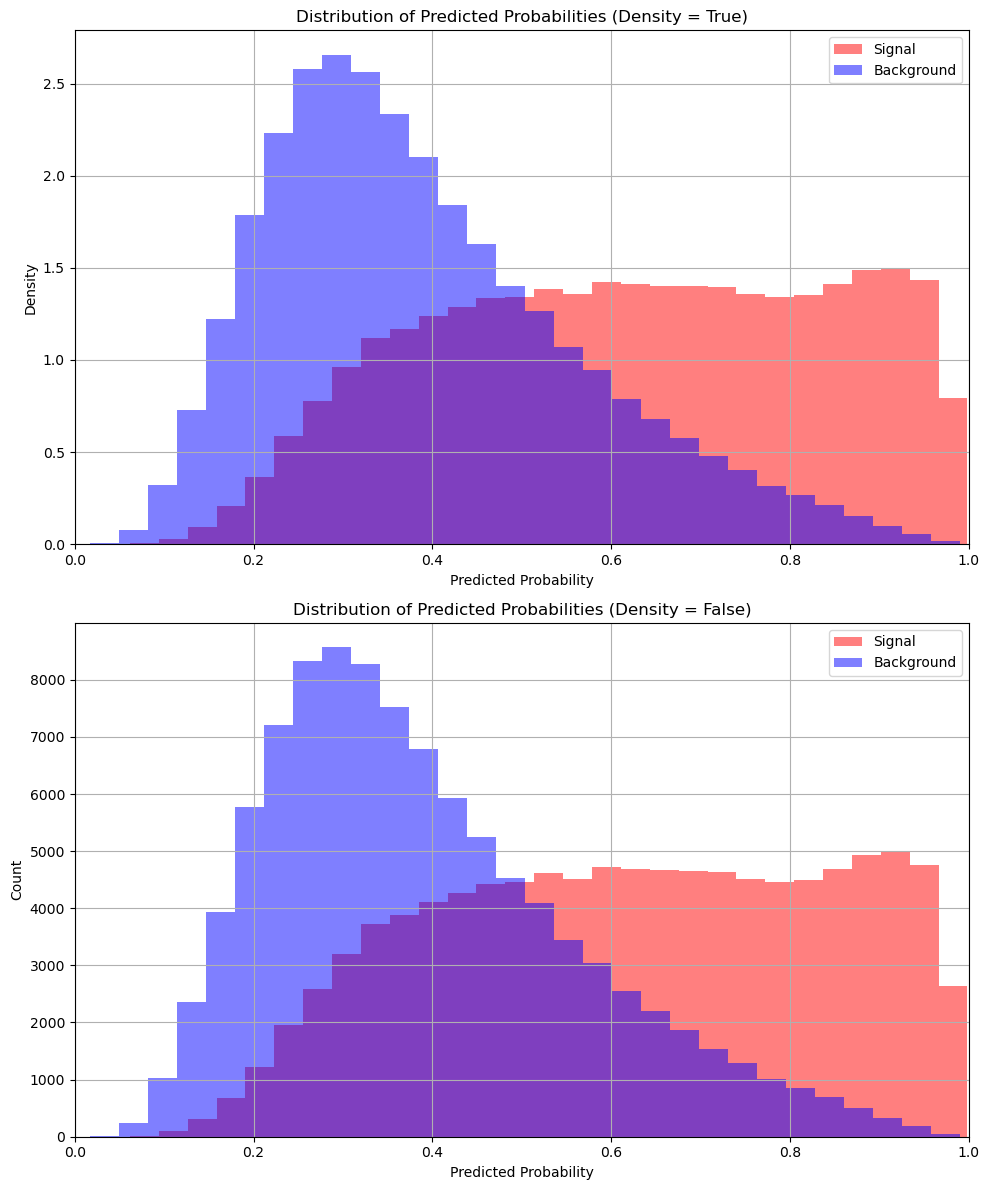

In [26]:
# Predict probabilities for the entire dataset
y_full_pred_proba = model.predict_proba(X)[:, 1]

# Create a DataFrame to hold the predicted probabilities with their corresponding target labels
predicted_probs_df = pd.DataFrame({'probability': y_full_pred_proba, 'target': y})

# Plot the distribution of predicted probabilities with density=True
plt.figure(figsize=(10, 12))

# First subplot: Density = True
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 1]['probability'], 
         bins=30, alpha=0.5, label='Signal', color='red', density=True)
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 0]['probability'], 
         bins=30, alpha=0.5, label='Background', color='blue', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities (Density = True)')
plt.legend()
plt.xlim(0, 1)  # Set x-axis limits to show probabilities between 0 and 1
plt.grid()

# Second subplot: Density = False
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 1]['probability'], 
         bins=30, alpha=0.5, label='Signal', color='red', density=False)
plt.hist(predicted_probs_df[predicted_probs_df['target'] == 0]['probability'], 
         bins=30, alpha=0.5, label='Background', color='blue', density=False)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities (Density = False)')
plt.legend()
plt.xlim(0, 1)  # Set x-axis limits to show probabilities between 0 and 1
plt.grid()

plt.tight_layout()
plt.show()
